# DATA620 Assignment 3: Graph Visualization

## Homework Team 3: David Simbandumwe, Eric Lehmphul and Lidiia Tronina

The objective of this week's assignment is:
* Load a graph database
* Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.
* Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.

### Load Required Packages

In [1]:
import networkx as nx
from networkx import algorithms 
from neo4j import GraphDatabase
import matplotlib.pyplot as plt
import nxneo4j as neo

### Import Data

The data used for this assignment was collected from https://snap.stanford.edu/data/ego-Facebook.html. We selected the "ego-Facebook" dataset in the Social Networks section. This dataset consists of facebook 'circles' (or 'friends lists'), where the nodes are an individual's profile and the edges are the relationship between two profiles. The original file contained 4,039 nodes and 88,234 edges. To more easily compute and visualize the data, we elected to truncate the dataset.

In [2]:
# Retrieve Data
Data = open('data/facebook_combined_s.txt', "r")

# initialize Graph
Graphtype = nx.Graph()

### Create Graph

In [3]:
# Create list of nodes and edges needed to create graph
g = nx.parse_edgelist(Data, delimiter=' ', create_using=Graphtype,
                      nodetype=int, data=(('weight', float),))

In [4]:
type(g) # Confirm that the type is appropriate for nx.draw function

networkx.classes.graph.Graph

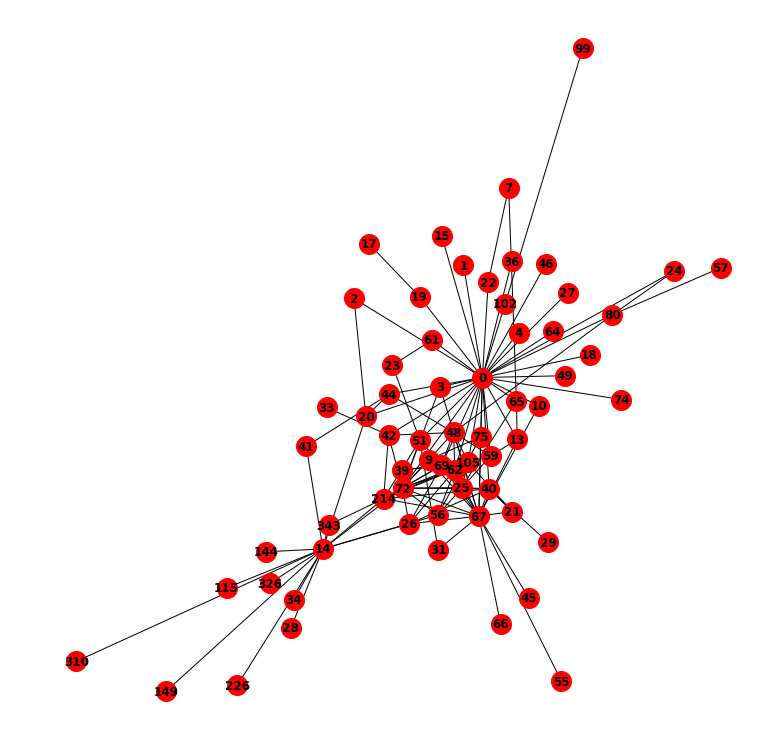

In [5]:
# Plot Graph
plt.figure(figsize=(10,10))
nx.draw(g, with_labels=True, node_size=400, font_color='black', font_weight='bold')

### Basic Analysis

In [6]:
#####      diameter      #####
print("Diameter of Network: ", algorithms.distance_measures.diameter(g))

Diameter of Network:  5


In [7]:
#####      shortest path    #####
print("Shortest Path: from 7 to 310: ", algorithms.shortest_path(g, 7, 310))

####       average shortest path length   #####
print("Average shortest path length: ", algorithms.average_shortest_path_length(g))

Shortest Path: from 7 to 310:  [7, 22, 0, 20, 14, 310]
Average shortest path length:  2.6780753968253967


In [8]:
#####      k_nearest_neighbors      #####
algorithms.k_nearest_neighbors(g)

{33: 4.090909090909091,
 1: 20.307692307692307,
 2: 14.076923076923077,
 3: 17.333333333333332,
 4: 13.071428571428571,
 8: 11.875,
 5: 11.533333333333333,
 6: 12.083333333333334,
 7: 12.142857142857142,
 19: 6.947368421052632,
 10: 10.65,
 16: 9.8125,
 9: 9.61111111111111,
 15: 3.533333333333333}

In [9]:
#####      average neighbor      #####
algorithms.average_neighbor_degree(g,44,310)

{0: 4.090909090909091,
 1: 33.0,
 2: 18.5,
 3: 22.666666666666668,
 4: 33.0,
 10: 26.0,
 13: 15.0,
 15: 33.0,
 18: 33.0,
 19: 17.0,
 20: 13.5,
 22: 17.5,
 24: 18.5,
 27: 33.0,
 36: 33.0,
 40: 11.875,
 42: 13.8,
 44: 12.0,
 46: 33.0,
 49: 33.0,
 51: 11.666666666666666,
 59: 12.75,
 61: 17.5,
 62: 14.0,
 64: 33.0,
 65: 11.5,
 67: 6.947368421052632,
 69: 11.6,
 72: 9.8125,
 74: 33.0,
 75: 15.5,
 80: 11.25,
 102: 17.0,
 105: 10.555555555555555,
 7: 3.0,
 9: 11.6,
 14: 3.533333333333333,
 17: 2.0,
 21: 12.0,
 23: 4.0,
 25: 10.285714285714286,
 26: 12.5,
 29: 8.0,
 31: 12.5,
 33: 5.0,
 39: 9.5,
 41: 9.5,
 45: 19.0,
 48: 8.666666666666666,
 55: 19.0,
 56: 9.2,
 57: 4.0,
 66: 19.0,
 99: 2.0,
 28: 15.0,
 115: 15.0,
 34: 15.0,
 144: 15.0,
 149: 15.0,
 214: 9.7,
 226: 15.0,
 310: 15.0,
 326: 15.0,
 343: 12.5}

## Neo4j

### Produce Graph using Neo4j and Cypher

To produce the graph in Neo4j the following script run:

LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/dsimband/DATA620_Group3/main/data/node_with_headers.csv' AS row

MERGE (e1:Edge1 {name : row.edge1})

MERGE(e2:Edge2 {name: row.edge2})

MERGE (e1)-[:FRIEND]->(e2)

RETURN((e1)-[:FRIEND]->(e2))

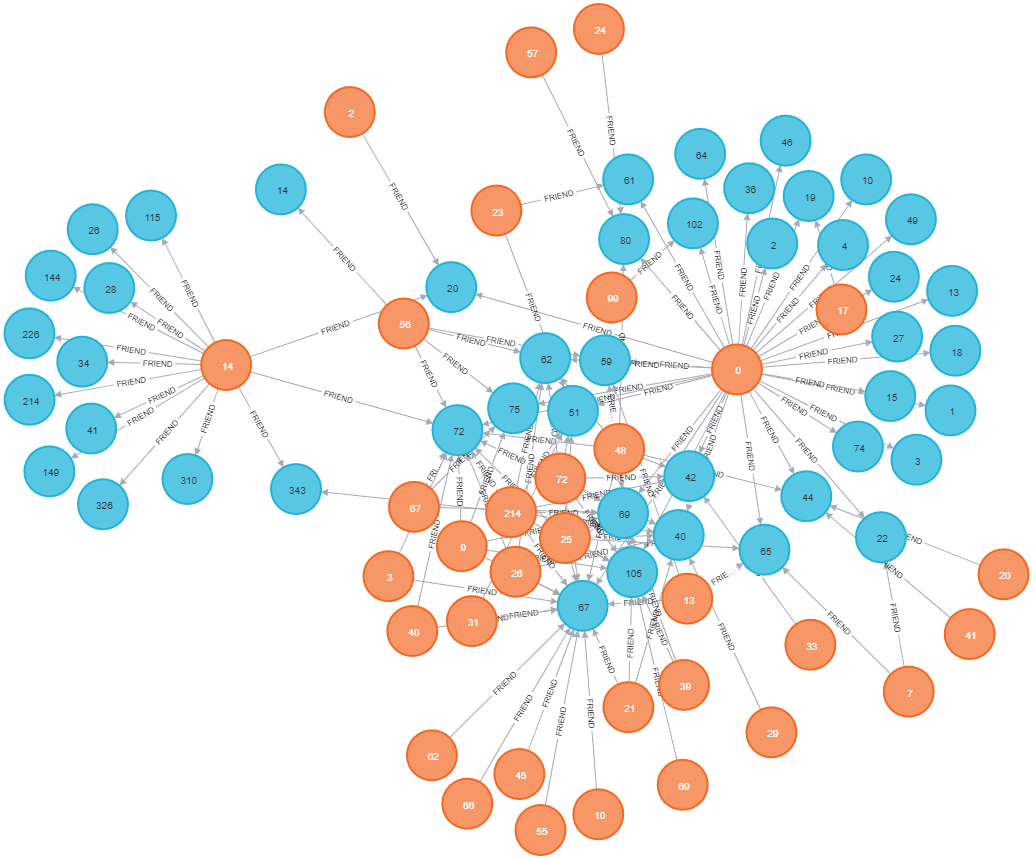

### Using nxneo4j to Produce Graph
* connect to neo4j database
* initialize and retrieve graph 
* draw graph
* close connection

In [10]:
# Establish connection
driver = GraphDatabase.driver(uri="bolt://localhost:7687",auth=("neo4j","AllAcd12"))

In [11]:
# Initialize graph
g_neo = neo.Graph(driver)

In [12]:
type(g_neo)

nxneo4j.graph.Graph

In [13]:
plt.figure(figsize=(10,10))
neo.draw(g_neo)

In [14]:
# Close connection
driver.close()

### YouTube Video

In [15]:
![DATA620_w3_GraphVisualization_v3](DATA620_w3_GraphVisualization_v3.mov)

zsh:1: unknown file attribute: 6
